<a href="https://colab.research.google.com/github/bahu1610/CaharatRiskModel/blob/main/CahartRiskModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pd #Database that has connections to many financial datasets
import matplotlib.pyplot as plt #Plotting tool

In [2]:
#Use Famafrench to get returns of common risk factor
pd.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
#Choose the start date
start = '1926-01-01'

In [4]:
#Load the data set from famafrench; Frequency is set to monthly (M) as daily returns are far too noisy; start date as above
ff = pd.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq = 'M', start = start).read()

<ipython-input-4-fdd575bb070d>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = pd.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq = 'M', start = start).read()
<ipython-input-4-fdd575bb070d>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = pd.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq = 'M', start = start).read()


In [5]:
#We can see that there are 2 sort of dataframe
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2024-01    0.70 -5.09 -2.38  0.47
 2024-02    5.06 -0.24 -3.49  0.42
 2024-03    2.83 -2.49  4.20  0.43
 2024-04   -4.67 -2.39 -0.52  0.47
 2024-05    4.34  0.54 -1.33  0.44
 
 [1175 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2019   28.28  -6.14 -10.46  2.15
 2020   23.66  13.18 -46.67  0.45
 2021   23.56  -3.89  25.49  0.04
 2022  -21.60  -6.94  25.83  1.43
 2023   21.70  -3.26 -13.63  4.95
 
 [97 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

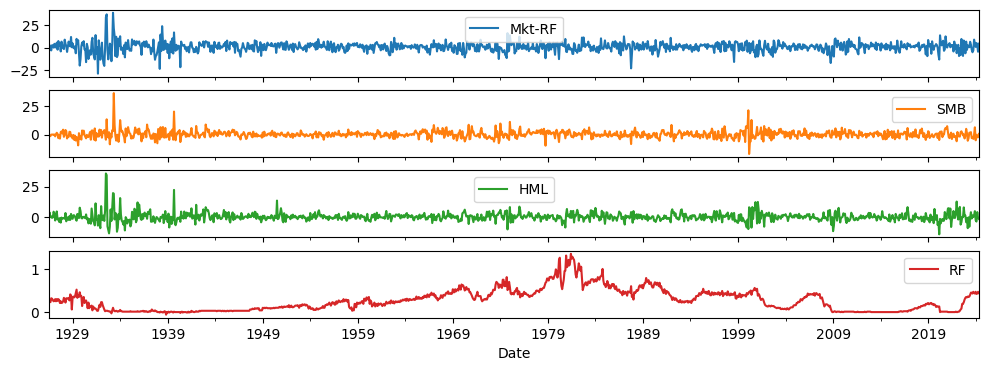

In [6]:
#check the first element and plot each frame by itself
ff_df = ff[0]
ff_df.plot(subplots = True, figsize = (12,4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

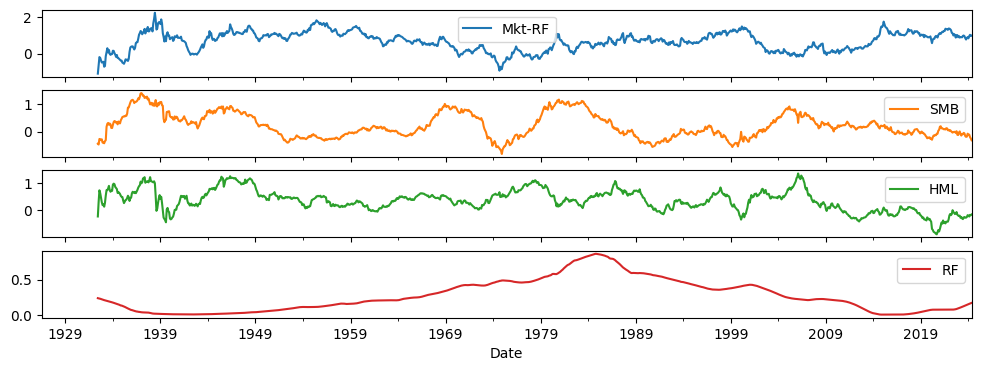

In [7]:
#The data series seem to be very noisy hence we use a 2-month rolling window to remove some of the noise
ff_df.rolling(72).mean().plot(subplots=True, figsize = (12,4))

<ipython-input-8-e013438e9071>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_mom_df = pd.famafrench.FamaFrenchReader("F-F_Momentum_Factor", freq = 'M', start = start).read()[0]
<ipython-input-8-e013438e9071>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_mom_df = pd.famafrench.FamaFrenchReader("F-F_Momentum_Factor", freq = 'M', start = start).read()[0]


array([<Axes: xlabel='Date'>], dtype=object)

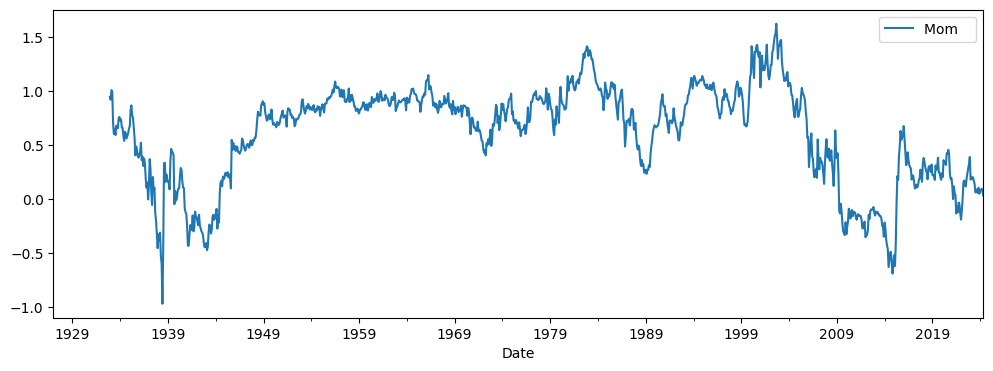

In [8]:
#Make a new dataframe for momentum data
ff_mom_df = pd.famafrench.FamaFrenchReader("F-F_Momentum_Factor", freq = 'M', start = start).read()[0]
ff_mom_df.rolling(72).mean().plot(subplots=True, figsize = (12,4))

In [9]:
#Now combine two dataframes: one of 3 risk factors and other of one risk factors
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2024-01,0.70,-5.09,-2.38,0.47
2024-02,5.06,-0.24,-3.49,0.42
2024-03,2.83,-2.49,4.20,0.43


In [10]:
ff_mom_df

,Mom
Date,
1927-01,0.36
1927-02,-2.14
1927-03,3.61
1927-04,4.30
1927-05,3.00
...,...
2024-01,5.11
2024-02,4.99
2024-03,-0.40


In [11]:
import pandas as fd
#Now merging both data frames based on the date variable and sorting it in ascending order;
ffac_merged_df = fd.merge(ff_df, ff_mom_df, on = 'Date', how = "inner", sort = "True", copy = True, indicator = False, validate = "one_to_one")

In [12]:
#Merged DataFrame
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2024-01,0.70,-5.09,-2.38,0.47,5.11
2024-02,5.06,-0.24,-3.49,0.42,4.99
2024-03,2.83,-2.49,4.20,0.43,-0.40


In [13]:
# ------- SMALL FIX --------
# First install the package to deal with yahoo finance data
!pip install yfinance
import yfinance as yf

# Now override the command to get data from yahoo finance in pandas data reader due to obsolete tech
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [14]:
#Now we will get data of the risk asset that we will regress on these risk factors;
#We take the adjusted close given that JPM's corporate actions have effects over its price based on splits, dividends etc
#ADJ Close not available so we use close

# We want a continuous series (FFILL) of the RETURNS rather than close price so we do a percentage change
# ---- First Method ----
ticker = yf.Ticker('ORCL')
ORCL_df = ticker.history(start = start, interval = '1mo')['Close'].ffill().pct_change()

In [15]:
#SECOND METHOD: Better one as it gives adjusted closer
ORCL_data = pd.data.get_data_yahoo('ORCL', start = start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%%**********************]  1 of 1 completed


In [16]:
ORCL_data

Date
1986-03-31         NaN
1986-04-30    0.204815
1986-05-31   -0.059992
1986-06-30    0.037225
1986-07-31   -0.364092
                ...   
2024-03-31    0.124731
2024-04-30   -0.091497
2024-05-31    0.030242
2024-06-30    0.204881
2024-07-31    0.014258
Freq: M, Name: Adj Close, Length: 461, dtype: float64

In [17]:
# Convert to Data Frame
ORCL_daf = ORCL_data.to_frame()
ORCL_daf

,Adj Close
Date,
1986-03-31,NaN
1986-04-30,0.204815
1986-05-31,-0.059992
1986-06-30,0.037225
1986-07-31,-0.364092
...,...
2024-03-31,0.124731
2024-04-30,-0.091497
2024-05-31,0.030242


In [19]:
# Now we would need to merge this with our risk factor model
# x: risk factor series and y: ORCL series do not have the same number of entries as dates are different

#First Check the date type as both are different
ORCL_daf.index.dtype



dtype('<M8[ns]')

In [20]:
ffac_merged_df.index.dtype

period[M]

In [21]:
# We would need to change the datatype otherwise cannot be merged
# So, we add a variable of commanility

ORCL_daf['str_date'] = ORCL_daf.index.astype(str)
ORCL_daf['dt_date'] = fd.to_datetime(ORCL_daf['str_date']).dt.strftime('%Y-%m')
ORCL_daf.dt_date.dtype


dtype('O')

In [23]:
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = fd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')
ffac_merged_df.dt_date.dtype

dtype('O')

In [31]:
# Now we can merge along the dt_date variable

ORCL_ffac_merged = fd.merge(ORCL_daf, ffac_merged_df, on='dt_date', how = 'inner', sort = True, copy = True, indicator = False, validate = 'one_to_one')

In [29]:
ORCL_ffac_merged

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y
0,NaN,1986-03-31,1986-03,4.88,-0.59,-0.39,0.60,2.41,1986-03
1,0.204815,1986-04-30,1986-04,-1.31,2.78,-2.87,0.52,-0.37,1986-04
2,-0.059992,1986-05-31,1986-05,4.62,-1.35,-0.21,0.49,2.05,1986-05
3,0.037225,1986-06-30,1986-06,1.03,-0.96,1.28,0.52,5.07,1986-06
4,-0.364092,1986-07-31,1986-07,-6.45,-3.36,4.70,0.52,1.83,1986-07
...,...,...,...,...,...,...,...,...,...
454,0.063576,2024-01-31,2024-01,0.70,-5.09,-2.38,0.47,5.11,2024-01
455,-0.000179,2024-02-29,2024-02,5.06,-0.24,-3.49,0.42,4.99,2024-02
456,0.124731,2024-03-31,2024-03,2.83,-2.49,4.20,0.43,-0.40,2024-03
457,-0.091497,2024-04-30,2024-04,-4.67,-2.39,-0.52,0.47,-0.42,2024-04


In [32]:
# Drop the columns that you do not need
ORCL_ffac_merged.drop(columns = ['str_date_x', 'str_date_y'], inplace = True)

In [34]:
ORCL_ffac_merged.rename(columns = {'Adj Close': 'ORCL'}, inplace = True)
ORCL_ffac_merged.head()

,ORCL,dt_date,Mkt-RF,SMB,HML,RF,Mom
0,NaN,1986-03,4.88,-0.59,-0.39,0.60,2.41
1,0.204815,1986-04,-1.31,2.78,-2.87,0.52,-0.37
2,-0.059992,1986-05,4.62,-1.35,-0.21,0.49,2.05
3,0.037225,1986-06,1.03,-0.96,1.28,0.52,5.07
4,-0.364092,1986-07,-6.45,-3.36,4.70,0.52,1.83


In [36]:
# Convert ORCL returns to the same decimals and subtract risk free rate
# By this we can get the premium returns from the risk factor model

ORCL_ffac_merged['ORCL_RF'] = ORCL_ffac_merged['ORCL']*100 - ORCL_ffac_merged['RF']
ORCL_ffac_merged.head()

,ORCL,dt_date,Mkt-RF,SMB,HML,RF,Mom,ORCL_RF
0,NaN,1986-03,4.88,-0.59,-0.39,0.60,2.41,NaN
1,0.204815,1986-04,-1.31,2.78,-2.87,0.52,-0.37,19.961525
2,-0.059992,1986-05,4.62,-1.35,-0.21,0.49,2.05,-6.489222
3,0.037225,1986-06,1.03,-0.96,1.28,0.52,5.07,3.202520
4,-0.364092,1986-07,-6.45,-3.36,4.70,0.52,1.83,-36.929201


In [38]:
# Get rid of the missing values

ORCL_ffac_merged.dropna(axis=0, inplace = True)

In [45]:
from statsmodels.api import OLS
#First endogeneous (Y) and then exogeneous (X)
# Market rf risk factor: Market and excess of the risk free rate
# SMB: Small Minus big risk factor or size factor
# HML: Value Factor
ORCL_ffac_merged.rename(columns = {'Mom   ': 'MOM'}, inplace = True)
results = OLS(ORCL_ffac_merged['ORCL_RF'], ORCL_ffac_merged[['Mkt-RF', 'SMB', 'HML', 'MOM']], missing = 'drop').fit()

In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                ORCL_RF   R-squared (uncentered):                   0.334
Model:                            OLS   Adj. R-squared (uncentered):              0.328
Method:                 Least Squares   F-statistic:                              56.98
Date:                Tue, 23 Jul 2024   Prob (F-statistic):                    6.02e-39
Time:                        19:03:26   Log-Likelihood:                         -1718.0
No. Observations:                 458   AIC:                                      3444.
Df Residuals:                     454   BIC:                                      3460.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.3504      0.112     12.085      0.000       1.131       1.570
SMB            0.4721      0.163      2.892      0.004       0.151       0.793
HML           -0.6598      0.160     -4.119      0.000      -0.975      -0.345
MOM            0.2271      0.112      2.037      0.042       0.008       0.446
==============================================================================
Omnibus:                       31.566   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.592
Skew:                           0.265   Prob(JB):                     2.13e-20
Kurtosis:                       5.113   Cond. No.                         1.86
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# However the above results do not have intercept so we need to fix that

import statsmodels.tools

# Add a datafeame with constant column [this column should have 1 all over it as mathematically you will need to have this in your x-matrix if you have an intercept]
ORCL_ffac_merged_c = statsmodels.tools.add_constant(ORCL_ffac_merged, prepend = True)

ORCL_ffac_merged_c.head()

,const,ORCL,dt_date,Mkt-RF,SMB,HML,RF,MOM,ORCL_RF
1,1.0,0.204815,1986-04,-1.31,2.78,-2.87,0.52,-0.37,19.961525
2,1.0,-0.059992,1986-05,4.62,-1.35,-0.21,0.49,2.05,-6.489222
3,1.0,0.037225,1986-06,1.03,-0.96,1.28,0.52,5.07,3.202520
4,1.0,-0.364092,1986-07,-6.45,-3.36,4.70,0.52,1.83,-36.929201
5,1.0,0.064507,1986-08,6.07,-4.17,3.51,0.46,-5.28,5.990709


In [49]:
#Now run the regression and add the constant column

results = OLS(ORCL_ffac_merged_c['ORCL_RF'], ORCL_ffac_merged_c[['const', 'Mkt-RF', 'SMB', 'HML', 'MOM']], missing = 'drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ORCL_RF   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     54.24
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           2.37e-37
Time:                        19:08:58   Log-Likelihood:                -1714.4
No. Observations:                 458   AIC:                             3439.
Df Residuals:                     453   BIC:                             3459.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3177      0.493      2.671      0.008       0.348       2.287
Mkt-RF         1.2913      0.113     11.409      0.000       1.069       1.514
SMB            0.4808      0.162      2.964      0.003       0.162       0.800
HML           -0.7027      0.160     -4.394      0.000      -1.017      -0.388
MOM            0.1800      0.112      1.605      0.109      -0.040       0.400
==============================================================================
Omnibus:                       32.842   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.654
Skew:                           0.283   Prob(JB):                     2.79e-21
Kurtosis:                       5.154   Cond. No.                         5.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Interpretation:
# The alpha for the model is positive and highly significant (as seen in const coefficient) at 1.3% per month
# It has a significant exposure to of beta: 1.29 on the market
# It has a significant exposure to value
# It has a negative significant exposure to value since Oracle is a growth stock
# It has an insignificant exposure to momentum

# Overall we explain about 31.8% of the variability in Oracle's return
